**Содержание**:

1. Теория
2. [Практический ноутбук](https://colab.research.google.com/drive/1UVxd61oXMs4vh5-kIVFbnLP4BR0Alr_-?usp=sharing)

На прошлом уроке вы изучили мощный инструмент – базу рукописных цифр MNIST, в которой 60 тысяч
примеров с картинками различных цифр. Этот датасет можно использовать для создания нейронной сети, которая распознает цифры, написанные человеком. 
И главный вопрос: как оценить, насколько хорошо обучена модель НС? 

В предыдущем уроке вы узнали про параметр `accuracy` (точность модели), который отвечает за  %
распознанных картинок. Эту характеристику можно использовать для оценки качества обучения, но этого недостаточно. 

Чтобы оценить точность мы создаем несколько видов выборок, а так же анализируем тренды в полученных точностях обучения. Рассмотрим это подробнее ниже, но сначала разберемся по шагам, как устроена схема обучения и проверки нейросети в целом.



# **Схема обучения нейросети**

**Шаг 1.** Сбор базы данных.

Это важный аспект, о котором не раз будет сказано на уроках. В ряде случаев качественно собранная база, у которой нет ошибок и выбросов, может составить 80% успеха обучения НС.

**Шаг 2.** Разделяем собранную базу на три набора: обучающий, проверочный (валидационный) и тестовый. Способы это сделать рассмотрены далее.

**Шаг 3.** Создаем первую архитектуру сети, настраиваем гиперпараметры. О том, что это далее.

**Шаг 4.** Запускаем обучение, отслеживаем оценку качества НС работы на обучающей и проверочной выборке. Нередки ситуации, когда на обучающей выборке будет 100%, но важна точность именно на проверочной.

**Шаг 5.** Если результаты предыдущего шага нам не подходят (слишком низкая точность или началось переобучение, см. далее), экспериментируем с гиперпараметрами, добавляем при необходимости слои нормализации и регуляризации.

**Шаг 6.** Оцениваем точность работы сети на тестовом наборе, который она ранее вообще никогда не видела.

# **Обучающая (train), проверочная (validation) и тестовая (test) выборки**

## Теория

Вспомните, что вы делали на предыдущем уроке. Вы использовали готовую базу из MNIST, состоящую из 60 тысяч изображений --> делили их на партии (батчи) --> подавали их в нейросеть и обучали ее. 

Обратите внимание, что при загрузке MNIST мы сразу получили два набора данных: train из 60000 изображений, и test из 10000. Использовали мы только первый из них, обучающий. Второй (тестовый) пока что нами использован не был.

В этом уроке мы узнаем, как самому делить выборку на части, а так же о том, что существует еще третий вид выборок - валидационная.


Процесс работы с выборками состоит в том, что вам нужно собрать максимально
возможную базу данных и разделить ее на три части. В рамках обучения редко применяется тестовая выборка, и датасет будет делиться только на две. 

**Важно!** В реальных задачах лучше оставлять данные под тестовую выборку, чтобы быть уверенным наверняка в результатах НС.



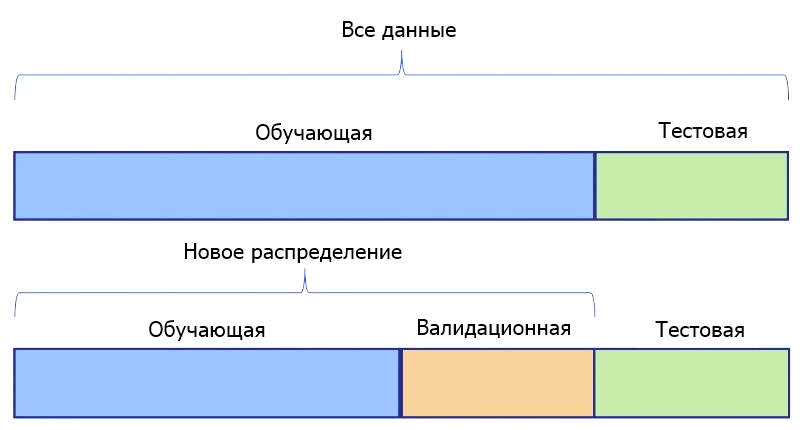

Итак, имеющийся у вас набор данных можно разделить на три:

1. **Обучающая выборка (training set, x_train)** - используется для обучения сети.

2. **Проверочная выборка (validation set, x_val)** - используется в процессе обучения для оценки качества обучения. Необходим для ситуаций, когда на обучающей выборке НС показывает 100% точность, но по факту плохо работает. Это означает, что сеть выучила все примеры и теперь не предсказывает, а выдает заученные ответы. 

    Использование проверочной выборки – первый шаг к оценке качества работы НС. Этот набор используется на каждой эпохе обучения. Важно, чтобы данные из проверочной и обучающей выборок не пересекались и не повторялись. Если НС выдает на данной выборке больше 95% можно считать, что сеть замечательно работает. 

    Вычленение проверочной части происходит обычно при подаче выборки на обучение, внутри метода `.fit()`, например. Мы можем выделить часть списка при помощи слайсинга, либо через параметр метода `validation_split=0.3` (процент для примера, вы ставите на свое усмотрение, сильно зависит от размера выборки).

3. **Тестовая выборка (test set, x_test)** - используется для оценки качества работы сети после завершения обучения. Используется при подготовке моедели в продакшн.

Чаще всего ее пропорция следующая: 80% - 15% - 5% или 80% - 10% - 10%. 
Но, в зависимости от задачи, вы можете делить так, как вам нужно.

Далее мы должны перемешать данные, так как сейчас классы расположены последовательно. Как и нормализация, перемешивание необходимо для равномерного обучения нейронной сети. Причем данные как массива изображений, так и массива меток должны быть перемешаны согласовано. Только так сохранится взаимно однозначное соответствие между массивом фотографии и его меткой класса. 



Загрузим части датасета MNIST и поместим их в переменные `x_train` и `y_train`, и на их примере рассмотрим способы разделения.


In [ ]:
from tensorflow.keras.datasets import mnist # загрузка всего датасет MNIST     
(x, y), (_ , _) = mnist.load_data() # запись в переменные нужных нам частей

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Посмотрим на размерность данных

print(x.shape)
print(y.shape)

(60000, 28, 28)
(60000,)


Мы имеем подборку 60000 изображений, и 60000 меток соотв. им классов.

## Разделение на train, validation, test

Самый простой, без использования сторонних функций. Позволяет сразу делить весь на датасет на нужное нам количество выборок, хоть на десять. 

Минус способа - классы как были последовательно расположены, так и останутся, это снижает эффективность обучения.

Пусть пропорции 80% - 10% - 10%, значит:
- обучающая выборка (`x_train`) составит `60000 * 0,8 = 48000`
- валидационная выборка (`x_val`) составит `60000 * 0,1 = 6000`
- тестовая выборка (`x_test`) составит `60000 * 0,1 = 6000`

In [ ]:
x_train = x[:48000]
x_val   = x[48000:54000]
x_test  = x[54000:]

print('Обучающая выборка    ', x_train.shape)
print('Валидационная выборка', x_val.shape)
print('Тестовая выборка     ', x_test.shape)

Обучающая выборка     (48000, 28, 28)
Валидационная выборка (6000, 28, 28)
Тестовая выборка      (6000, 28, 28)


Проделаем то же самое для набора меток. Так как мы вырезаем одни и те же части наборов, соответствие изображений и меток их классов сохраняется.

In [ ]:
y_train = y[:48000]
y_val   = y[48000:54000]
y_test  = y[54000:]

print('Обучающая выборка (метки)    ', y_train.shape)
print('Валидационная выборка (метки)', y_val.shape)
print('Тестовая выборка (метки)     ', y_test.shape)

Обучающая выборка (метки)     (48000,)
Валидационная выборка (метки) (6000,)
Тестовая выборка (метки)      (6000,)


## Разделение на train, test

**1-й способ - маска**

Еще один способ - наложить маску (`valMask`) на датасет.

Алгоритм:
- определить, какой процент из общей выборки пойдет в тестовую, поместить его в переменную `splitVal` в виде дроби
- создать из чисел от 0 до 1 список `mask_list`, равный по длине всей выборке. Используем метод `np.random.sample()`. В качестве аргумента он получает длину выборки.
- рассортировать значения в списке по принципу "меньше / больше, чем  `splitVal`", присвоить им булевы значения
- поместить результат в список `valMask`

Метод хорош тем, что наложение маски на разные наборы сохраняет соответствие. То есть если мы возьмем из `x_train` все четные значения (для примера), то и из `y_train` эта маска возьмет аналогично все четные. 

В то же время рандомность даёт эффект перемешивания, что для нас несомненный плюс. Мы отсекаем не первые 20%, и не последние, а случайные.

In [ ]:
import random
import numpy as np

Создадим маску (`valMask`) и антимаску (`~valMask`), выведем на печать ее часть. Отратите внимание, что они взаимообратны:

In [ ]:
# Процент, который выделяем в тестовую выборку
splitVal = 0.2 

# Список из случайных значений от 0 до 1, длиной равной х
mask_list = np.random.sample(x.shape[0])

# Создаём маску True-False для создания проверочной выборки
valMask = mask_list < splitVal 

print(len(valMask))
print(valMask[:10])
print(~valMask[:10])

60000
[False False False  True False  True  True  True False False]
[ True  True  True False  True False False False  True  True]


Удостоверимся, что разделение соответствует указанному коэффициенту. Создадим два счетчика (`tr` для `True`, `fl` для `False`) и будем увеличивать их каждый раз, как встретим то или иное значение:

In [ ]:
tr = 0
fl = 0

for i in valMask: # перебираем элементы списка 
  if i:           # если истина
    tr += 1       #
  else:           # если ложь
    fl += 1 #

print('Количество True: ', tr) #
print('Количество False:', fl) #
print()
print('Заданный процент разделения:', splitVal) #
print('Доля True: ', round(tr/(tr + fl),2))
print('Доля False:', round(fl/(tr + fl),2))

Количество True:  12168
Количество False: 47832

Заданный процент разделения: 0.2
Доля True:  0.2
Доля False: 0.8


Обратите внимание, что здесь на нас работает теория вероятности, т.е. чем больше длина `valMask` и общей выборки соотв., тем точнее будет соблюдаться нужная пропорция. 

Если вы поэкспериментируете и вместо 60000 возьмете длину 100, результаты будут куда более переменчивыми. То есть этот метод годится только для больших выборок.

 **2-й способ - train_test_split**

Библиотека `sklearn` содержит в себе функцию `train_test_split`, которая согласованно перемешает данные (сохранит соответсвие классов и их меток) и выделит выборки в указанном нами процентном соотношении.

In [ ]:
# импорт библиотеки
from sklearn.model_selection import train_test_split 

Функция имеет несколько аргументов:

* `x_data` и `y_data` – разделяемые наборы данных;
* `test_size` – процент значений, которые пойдут в тестовую выборку;
* `shuffle` – требование перемешивания данных. Без перемешивания выборки будут сформированы в порядке следования примеров из датасета, что может привести к попаданию в тестовую выборку примеров только одного класса, возможные значения True / False
* `random_state` – параметр воспроизводимости. Если его указать, то при повторном запуске данные будут перемешаны в том же порядке. Чаще всего используют 0 или 42.

Функция возвращает:

* `x_train`, `x_test`, `y_train`, `y_test` – результаты работы функции, обучающая и тестовая выборки;

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, # ----------------- датасет с изображениям
                                                    y, # ----------------- датасет с метками
                                                    test_size = 0.1, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # --- 

print('Обучающая выборка изображений', len(x_train))
print('Обучающая выборка меток', len(y_train))
print()
print('Тестовая выборка изображений', len(x_test))
print('Тестовая выборка меток', len(y_test))

Обучающая выборка изображений 54000
Обучающая выборка меток 54000

Тестовая выборка изображений 6000
Тестовая выборка меток 6000


 **3-й способ - самописный train_test_split**

Чтобы разобраться, как устроен метод `train_test_split`, напишем схожую функцию `unison_shuffled_split()`, чтобы пошагово отследить процесс.

На вход функции вы подаете списки `a`, `b` и параметр `test_size` (указывает, какой процент выборки выделить для теста): 

1. через `np.array` переводим списки в массивы, т.к. это более удобный инструмент для работы с индексами элементов списка.

2. через `assert len(a) == len(b)` вы сравниваете длину списков. Если они не равны, то функция выдает ошибку.

3. через функцию `np.random.permutation()` вы можете получить случайную перестановку элементов массива - `np.random.permutation(a)`, или случайную последовательность заданной длины из его элементов - `np.random.permutation(len(a))`.

4. `s = round(len(a)*test_size)` – так вы получите номер индекса, который делит список на две части.

5. переопределите списки с расположением элементов согласно перемешанному списку индексов и переведите из массива в список: `a = a[p].tolist(), b = b[p].tolist()`.

Выведите 4 полученных списка: `a[s:], a[:s], b[:s], b[s:]`.


In [ ]:
import numpy as np # Библиотека работы с массивами
import random # Для генерации случайных чисел 

def unison_shuffled_split(a, # список
                          b, # список
                          test_size # процент базы, который пойдет в тест 
                          ):
    
    a = np.array(a) # перевод списка в нампи-массив
    b = np.array(b)

    assert len(a) == len(b) # сравнение длин массивов

    p = np.random.permutation(len(a)) # перемешивание индексов элементов списка случайным образом
    s = round(len(a)*test_size) # получение индекса элемента, разбивающего датасет на 2 части

    a = a[p].tolist() # перемещение элементов согласно перемешанному списку индексов
    b = b[p].tolist()
    
    return a[s:], a[:s], b[s:], b[:s] # возвращает 4 списка

In [ ]:
x_train, x_test, y_train, y_test = unison_shuffled_split(x, # ----- датасет с изображениям
                                                         y, # ----- датасет с метками
                                                         0.2) # --- процент тестовых значений

print('Промежуточная база изображений', len(x_train))
print('Промежуточная база меток', len(y_train))
print('Тестовая база изображений', len(x_test))
print('Тестовая база меток', len(y_test))

Промежуточная база изображений 48000
Промежуточная база меток 48000
Тестовая база изображений 12000
Тестовая база меток 12000


Все перемешано с сохранением соответствия меток классам изображений. Отличие - здесь не реализован механизм random_state.

## Выделение validation

Валидационную выборку мы вычленяем из обучающей, поэтому нам доступны ровно те же самые методы, что мы рассмотрели выше: маска, `train_test_split`.

Но существует еще одна, возможно более удобная возможность - использовать параметр `validation_split` метода `.fit()`. То есть сеть сама в процессе обучения отделит проверочную часть выборки от обучающей, наша задача только указать желаемый процент. Перемешивание включено по умолчанию:

    model.fit(x_train, 
              y_train,
              batch_size=8, 
              epochs=100,
              validation_split=0.2,  <-- 20% использовать для проверки
              verbose=1)


Схожий вариант - параметр `validation_data` метода `.fit()`. Отличие в том, что мы не указываем долю, а задаем проверочные выборки прямо (через слайсинг, либо выделив проверочную заранее способами выше):

    model.fit(x_train, 
              y_train,
              batch_size=8, 
              epochs=100,
              validation_data=(x_train[56000:], y_train[56000:]),
              verbose=1)

**Важно!** 

Способы подачи проверочных данных через `train_test_split` и `validation_split` содержат автоматическое перемешивание, т.е. вы никак не влияете на то, какие экземпляры выборок попадут в тот или иной класс, вы определяется только пропорцию.

Эта ранодомность может повлиять на качество обучения сети, оно может быть выше / ниже чем при подаче через `validation_data`.

Есть смысл попробовать подать иначе, если вы  недовольны качеством обучения нейросети и перенастраиваете гиперпараметры.

# **Подбор гиперпараметров**

Каждая НС имеет два вида параметров: изменяемые и неизменяемые. 

1. в изменении первых самой нейросетью от эпохи к эпохе заключается суть обучения, к ним относятся весовые коэффициенты, например.

2. вторые составляют конфигурацию модели, настраиваются вами и НЕ изменяются самой нейросетью в процессе обучения, имеют название **гиперпараметры модели**.

  К ним относятся:

  * количество слоев в модели;
  * типы слоев нейросети
  * количество нейронов в каждом слое;
  * скорость обучения (**learning rate**);
  * размер мини-выборки при обучении (**batch size**).
  * функция ошибки ...

Основная задача разработчиков – найти такое сочетание гиперпараметров, при котором будет достигнута максимальная точность работы нейросети.

# **Визуализация качества обучения**

Создадим примитивную сеть и обучим ее на наборе MNIST, все подробности в предыдущем уроке. Она пригодится для того, чтобы познакомиться с графическим отображением качества обучения.

Просто запустите ячейку ниже:

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential 

# Основные слои
from tensorflow.keras.layers import Dense 

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# ------

from tensorflow.keras.datasets import mnist # загрузка всего датасет MNIST     
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

x_train = x_train_org.reshape(x_train_org.shape[0], -1)   
x_test = x_test_org.reshape(x_test_org.shape[0], -1)  

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

from tensorflow.keras import utils              
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

# ------

# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(800, input_dim=784, activation='relu')) 
model.add(Dense(400, activation='relu')) 
model.add(Dense(10, activation='softmax')) 

# Компиляция и возврат модели
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

Прежде чем запустить процесс обучения, познакомимся с возможностью поместить в переменную результат обучения сети, то есть вместо `model.fit()` запишем `history = model.fit()`:

In [ ]:
history = model.fit(x_train,              # Обучающая выборка  
                    y_train,              # Обучающая выборка меток класса
                    batch_size=8,         # Размер батча (пакета)
                    epochs=100,           # Количество эпох обучения
                    validation_split=0.1, # доля проверочной выборки
                    verbose=1)            # Отображение хода обучения

Epoch 1/100
6750/6750 [==============================] - 15s 2ms/step - loss: 0.1991 - accuracy: 0.9393 - val_loss: 0.1002 - val_accuracy: 0.9713
Epoch 2/100
6750/6750 [==============================] - 13s 2ms/step - loss: 0.1006 - accuracy: 0.9701 - val_loss: 0.0795 - val_accuracy: 0.9767
Epoch 3/100
6750/6750 [==============================] - 13s 2ms/step - loss: 0.0753 - accuracy: 0.9781 - val_loss: 0.1040 - val_accuracy: 0.9708
Epoch 4/100
6750/6750 [==============================] - 13s 2ms/step - loss: 0.0631 - accuracy: 0.9820 - val_loss: 0.1066 - val_accuracy: 0.9772
Epoch 5/100
6750/6750 [==============================] - 13s 2ms/step - loss: 0.0541 - accuracy: 0.9849 - val_loss: 0.0961 - val_accuracy: 0.9770
Epoch 6/100
6750/6750 [==============================] - 13s 2ms/step - loss: 0.0470 - accuracy: 0.9870 - val_loss: 0.1274 - val_accuracy: 0.9793
Epoch 7/100
6750/6750 [==============================] - 13s 2ms/step - loss: 0.0442 - accuracy: 0.9877 - val_loss: 0.1205 -

Посмотрим, что из себя представляет `history`:

In [ ]:
print(type(history))

<class 'keras.callbacks.History'>


Это словарь, посмотрим его ключи:

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


* `'loss'` - значения ошибки на обучающей выборке
* `'accuracy'` - точность на обучающей выборке
* `'val_loss'` - значения ошибки на проверочной выборке
* `'val_accuracy'` - точность на проверочной выборке

К данным можно обращаться и выводить, как и с обычным словарем:

In [ ]:
# Вывод значений ошибки (loss) на обучающей выборке
print(history.history['loss'][:5])

[0.19905300438404083, 0.10056571662425995, 0.07530052959918976, 0.06306149065494537, 0.05408889800310135]


In [ ]:
# Вывод значений точности распознавания (loss) на проверочной выборке
print(history.history['val_accuracy'][:5])

[0.9713333249092102, 0.9766666889190674, 0.9708333611488342, 0.9771666526794434, 0.9769999980926514]


Оформим вывод красиво, при помощи метода `.format()`.

---
Дополнительная информация ([База знаний УИИ | **Форматирование строк. Метод .format()**](https://colab.research.google.com/drive/1UiF-wgnFhlac6jnWLNqGmU93cHjtT6rI?usp=sharing))

---


In [ ]:
# Вывод значения точности распознавания на проверочной выборке по эпохам

val_acc = history.history['val_accuracy']

for i in range(5):
    # .format() - метод форматирования данных при выводе
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность: 97.1%
Эпоха:  1 точность: 97.7%
Эпоха:  2 точность: 97.1%
Эпоха:  3 точность: 97.7%
Эпоха:  4 точность: 97.7%


Построим графики точности на обучающей и проверочной выборках на протяжении всего обучения:

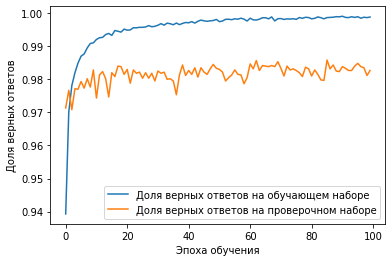

In [ ]:
# Рисование графиков
import matplotlib.pyplot as plt    

# Отрисовка графика точности на обучающей выборке
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Отрисовка графика точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

Построим графики ошибки:

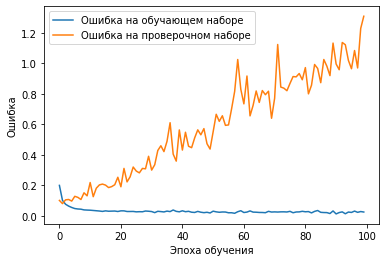

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()

plt.show()

Последний график имеет большое значение для нейронщика. Если ошибка на обучающей выборке стремится к 0, а на проверочной выборке снижается, но потом снова растет – это эффект переобучения. Подробнее такой пример мы изучим в практической части.

# **Переобучение**

Возможна ситуация, когда точность на обучающем наборе растет, а на проверочном до какой-то эпохи росла, а затем стала снижаться. Это момент начала переобучения НС. То есть на обучающем наборе НС научилась решать задачу со 100%, но не способна решать поставленную задачу для примеров, которые не видела. И это большая проблема, так как главная задача НС – научится обобщать данные. Не найти какие-либо закономерности и зазубрить их, а именно обобщать данные.

Можно провести параллель с ребенком, который начинает изучать мир. В какой-то
момент он узнает, что существуют кошки, видит несколько пород, чаще всего домашних. Но, если ребенок увидит породу сфинкс, это не помешает ему определить, что это кошка. То же самое и с НС.

Ваша задача, чтобы нейронка по информации, которую она ни разу не видела,
безошибочно определила, что за данные перед ней. Так же, как и с примером MNIST: НС может заучить 60 тысяч картинок и давать 100% точность. Но в момент, когда вы сами напишите цифру и подадите ее на вход, плохо обученная НС не сможет распознать цифру.

## Причины 

**1. Маленькая база.**

Вы будете часто сталкиваться именно с этой проблемой. В рамках курса вы узнаете способы, как искусственно расширить базу данных. Например, аугментировать их. Но лучше набирать максимально возможную базу. Самые
крутые нейронки по генерации лиц, да и в целом НС по обработке изображений, обучались на 10 млн примеров. Но бывают и случаи, когда база небольшая, и нет
естественных способов ее расширить.


**2. Плохо собранная база.** 

Происходит в том случае, когда сбор данных поручают
фрилансерам или используют парсер для веб-ресурсов. Здесь важно проверять
данные, которые вы получите. Самый живой пример – база автомобилей, которую
в УИИ собирали через фрилансеров. Необходимо было собрать изображения
машин по определенным маркам. И фрилансер, используя парсер веб-сайтов,
собрал данную базу. При проверке оказалось, что в папке с примерами автомобиля
«Ягуар» были фотографии животного, а в папке «Тесла» – изобретателя Тесла.
Такие примеры вносят дисбаланс в работу НС, так как она учится распознавать
автомобиль, а ей подают фото животных или людей. Так же качество базы
ухудшают перепутанные метки. На примере MNIST: для картинки цифры 2 стоит
метка цифры 8. В таком случае НС будет путаться, так как она предскажет по
картинке цифру 2, а вы ей в ответ скажете «нет, неправильно – это цифра 8».


**3. Слишком сложная архитектура сети.** 

За весь курс вы часто услышите, что при создании любой НС нужно начинать с самых простых архитектур. Есть задачи, которые решаются НС в один слой. Если использовать много слоев, то значительно
увеличится время обучения НС, и может появится эффект переобучения.


**4. Разбалансировка базы** 

Ситуация, когда различается количество примеров для
разных классов. Например, для автомобилей. Задача: создать НС для определения
марок авто «Мерседес», «Феррари» и «Рено». Если в папках будет примерно по
тысяче изображений каждой марки, то это хорошо. Плохо, если будет 5 000
изображений «Мерседесов», 500 «Феррераи» и 10 – «Рено». Хотя и база больше, но
пользы в ней меньше из-за разбалансировки. Старайтесь, чтобы количество
примеров в разных классах было примерно одинаковым.


**5. Слишком много эпох обучения**

Сеть может может переучиться даже на хорошей базе, если учится слишком долго. 

## Решение проблемы 

Теперь, когда вам понятны причины переобучения, вы можете узнать, как решить эту
проблему. Они вытекают из причин:

1. увеличение базы
2. чистка базы от выбросов, мусора (особенно актуально для текста)
3. упрощение архитектуры (откат до минимально простой и постепенное усложнение) 
4. добавление слоев регуляризации Dropout() и нормализации BatchNormalization() из библиотеки Keras (см. практика) 
5. дополнение малопредставленных классов при разбалансировке, аугментация
6. отслеживание метрик по графикам, нахождение оптимального количества эпох

### Dropout (отключение доли нейронов)

Возможно, переобучение происходило из-за того, что нейроны выстроили определенную структуру. Например, первый нейрон отвечал за распознавание первых пяти признаков, второй – за следующие и так далее. Каждый нейрон научился отвечать за узкое место при обнаружении признаков. 

При отключении части нейронов, соседние берут на себя функции их для того, чтобы задача продолжала правильно решаться. 

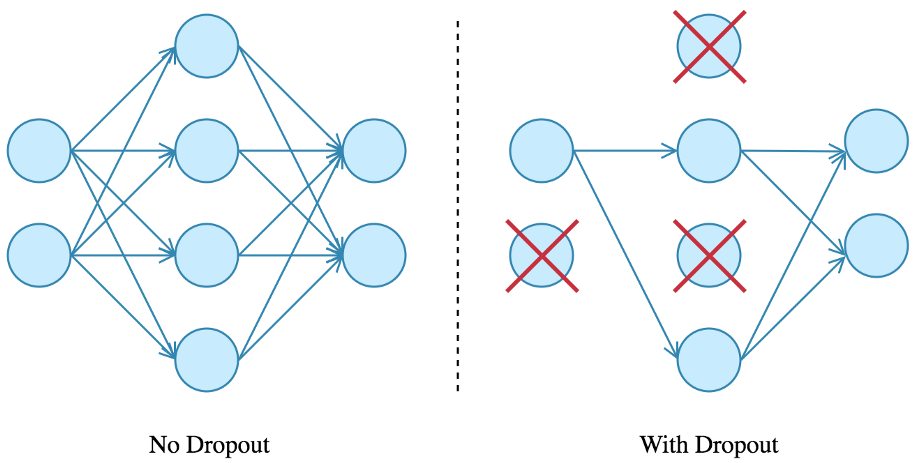

Слой отключает определенное количество нейронов в каждом батче обучения, выбор происходит случайно. Для правильного
решения поставленной задачи оставшиеся нейроны берут на себя часть функций
неактивных нейронов. 

На следующем батче удалятся другие случайно выбранные нейроны, и процедура повторится. В итоге все нейроны останутся на месте, так как они отключались на время обучения НС на одном батче. Таким образом слой Dropout частично решает проблему переобучения.

В Keras это реализовано таким образом, что Dropout – такой же слой, как и Dense.
Поэтому достаточно добавить его при помощи метода `.add()`, указав в скобках параметр `rate` (процент отключаемых нейронов в десятичной записи): 

    # добавление слоя Dropout()
    model.add(Dropout(0.3))

Слой можно поставить первым, тогда добавляется параметр `input_dim`, описывающий размерность входящих данных:

    model.add(Dropout(0.3, input_shape=(x_train.shape[1],)))



Данный способ чаще всего помогает решить проблему переобучения, но в некоторых случаях может и ухудшить качество обучения.

---
Дополнительная информация ([База знаний УИИ - «**Слой Dropout**»](https://colab.research.google.com/drive/1osq7ymKeVmwWM_yvMibaLXTE924arOqP?usp=sharing))

---

### BatchNormalization (пакетная нормализация)

Алгоритмы машинного обучения лучше работают с нормализованными данными, то есть:

- в диапазоне от 0 до 1
- со средним значением 0 и стандартным отклонением 1 (от -1 до 1)

Но особенности обучения многослойных нейросетей таковы, что иногда при изменении весов связей предыдущего слоя статистическое распределение выходных значений нейронов текущего слоя становится заметно другим.

В ряде случаев это может существенно снижать скорость обучения и, кроме того, для адаптации в таких условиях приходится устанавливать малое значение шага обучения (learning_rate), чтобы весовые коэффициенты имели возможность подстраиваться под разные статистические распределения.

Решение кажется здесь очевидным: если проблема в изменении статистических характеристик распределения на выходах нейронов, то давайте их стандартизировать, нормализовывать – приводить к единому виду. Именно это и делается при помощи предложенного алгоритма 
Batch Normalization.

В Keras это реализовано таким образом, что BatchNormalization – такой же слой, как и Dense. Поэтому достаточно добавить его при помощи метода .add(), не указывая в скобках никаких параметров:

    # добавление слоя BatchNormalization()
    model.add(BatchNormalization())

Слой батч-нормализации реализован в Keras так же, как и любой другой слой. 



Польза от использования данного
инструмента:
* в некоторой степени предотвращает эффект переобучения;
* меньшая чувствительность к начальным весам;
* возможность увеличить шаг обучения;
* большая независимость слоев относительно друг друга.


---
Дополнительная информация ([База знаний УИИ - «**Слой BatchNormalization**»](https://colab.research.google.com/drive/1tT74848tqrvZuQ2InRrxTH6U1P9FvD-K?usp=sharing))

---



Чтобы понять, нужны ли слои Dropout() и BatchNormalization(), НС начинают строить без них. 

Если возникает необходимость, то добавляют один из инструментов, в редких случаях – оба. И затем смотрят на результат.

# **Оценка качества обучения**

Проверьте, как НС будет работать на тестовых данных, используя метод `.evaluate()`. Он позволяет рассчитать ошибку и точность на любом наборе данных. В этом его отличие от метода `.predict().`

**Важно!**

`.predict()` – вычисление предсказания модели, `.evaluate()` – способ проверки, насколько качественно предсказание делается. То есть  `.evaluate()` предусматривает вызов `.predict()` внутри.

Применим метод `.evaluate()` к нашей модели, в качестве параметров передадим ему тестовые выборки и согласие на отображение хода вычисления. Поместим результат в переменную `scores`:

In [ ]:
scores = model.evaluate(x_test, 
                        y_test, 
                        verbose=1
                        )

313/313 [==============================] - 1s 2ms/step - loss: 1.2205 - accuracy: 0.9811


Посмотрим, что находится в переменной `scores`:

In [ ]:
print(type(scores))
print(scores)

<class 'list'>
[1.2205218076705933, 0.9811000227928162]


Это значение ошибки сети (loss) и доля правильно распознанных примеров на тестовой выборке.

In [ ]:
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Процент верных ответов на тестовых данных: 98.0 %


**Выводы:**

- `Точность на обучающей выборке` имеет самую низкую важность. Поскольку модели НС при обучении предъявляются и входные данные, и правильные ответы к ним, она может их просто зазубрить.

- `Точность на проверочной` важнее, так как её сеть видит только после окончания эпохи обучения и использует для проверки. 

- `Точность на тестовой выборке` самая важная, так как она в процессе обучения в принципе не предъявляется модели. 

**Содержание**:

1. Теория
2. [Практический ноутбук](https://colab.research.google.com/drive/1UVxd61oXMs4vh5-kIVFbnLP4BR0Alr_-?usp=sharing)